# Recurrences unfolding

In [18]:
%run "recurrences.py"

In [19]:
import sys
import sympy
from sympy import *
from sympy.abc import x, n, z, t, k
from sympy.core.cache import *
    
init_printing(use_latex='mathjax') # for nice printing, a-la' TeX

sys.setrecursionlimit(100000)

---

## Quicksort's checks recurrence

In [3]:
c = IndexedBase('c')
checks_recurrence = Eq(c[n]/(n+1), 2/(n+1) + c[n-1]/n)
checks_recurrence

 c[n]     2     c[n - 1]
───── = ───── + ────────
n + 1   n + 1      n    

In [4]:
checks_recurrence_spec=dict(recurrence_eq=checks_recurrence, indexed=c, index=n, terms_cache={})

In [5]:
unfolded = do_unfolding_steps(checks_recurrence_spec, steps=1)

In [6]:
project_recurrence_spec(unfolded, recurrence_eq=True)

 c[n]   c[n - 2]   2     2  
───── = ──────── + ─ + ─────
n + 1    n - 1     n   n + 1

In [7]:
unfolded = do_unfolding_steps(checks_recurrence_spec,4)
recurrence_eq = project_recurrence_spec(unfolded, recurrence_eq=True)
recurrence_eq

 c[n]     2     c[n - 5]     2     2     2       2  
───── = ───── + ──────── + ───── + ─ + ───── + ─────
n + 1   n - 3    n - 4     n + 1   n   n - 1   n - 2

In [8]:
recurrence_eq.subs(n,5)

c[5]          29
──── = c[0] + ──
 6            10

In [9]:
project_recurrence_spec(unfolded, terms_cache=True)

⎧c[n - 1]  c[n - 2]   2  c[n - 4]    2     c[n - 5]  c[n - 3]    2     c[n - 4
⎨────────: ──────── + ─, ────────: ───── + ────────, ────────: ───── + ───────
⎩   n       n - 1     n   n - 3    n - 3    n - 4     n - 2    n - 2    n - 3 

]  c[n - 2]    2     c[n - 3]⎫
─, ────────: ───── + ────────⎬
    n - 1    n - 1    n - 2  ⎭

In [10]:
boundary_conditions = {c[0]:Integer(0)}

checks_recurrence_spec=dict(recurrence_eq=checks_recurrence, indexed=c, index=n, 
                            terms_cache=boundary_conditions)

unfolded = do_unfolding_steps(checks_recurrence_spec, steps=4)

In [11]:
instantiated_rec_spec = base_instantiation(unfolded)

In [12]:
project_recurrence_spec(instantiated_rec_spec, recurrence_eq=True, terms_cache=True)

⎛⎧         c[1]            c[2]  c[1]   2  c[3]  c[2]   1  c[4]  c[3]   2⎫  c[
⎜⎨c[0]: 0, ────: c[0] + 1, ────: ──── + ─, ────: ──── + ─, ────: ──── + ─⎬, ──
⎝⎩          2               3     2     3   4     3     2   5     4     5⎭   6

5]          29⎞
── = c[0] + ──⎟
            10⎠

In [13]:
fully_instantiated_spec = repeated_instantiating(instantiated_rec_spec)

In [14]:
project_recurrence_spec(fully_instantiated_spec, recurrence_eq=True, terms_cache=True)

⎛⎧         c[1]     c[2]       c[3]        c[4]  77⎫  c[5]   29⎞
⎜⎨c[0]: 0, ────: 1, ────: 5/3, ────: 13/6, ────: ──⎬, ──── = ──⎟
⎝⎩          2        3          4           5    30⎭   6     10⎠

In [15]:
ipython_latex(checks_recurrence_spec, times_range=range(10))

<IPython.core.display.Latex object>

In [16]:
project_recurrence_spec(checks_recurrence_spec, terms_cache=True)

⎧c[n - 1]  c[n - 2]   2  c[n - 9]    2     c[n - 10]  c[n - 8]    2     c[n - 
⎨────────: ──────── + ─, ────────: ───── + ─────────, ────────: ───── + ──────
⎩   n       n - 1     n   n - 8    n - 8     n - 9     n - 7    n - 7    n - 8

9]  c[n - 7]    2     c[n - 8]  c[n - 6]    2     c[n - 7]  c[n - 5]    2     
──, ────────: ───── + ────────, ────────: ───── + ────────, ────────: ───── + 
     n - 6    n - 6    n - 7     n - 5    n - 5    n - 6     n - 4    n - 4   

c[n - 6]  c[n - 4]    2     c[n - 5]  c[n - 3]    2     c[n - 4]  c[n - 2]    
────────, ────────: ───── + ────────, ────────: ───── + ────────, ────────: ──
 n - 5     n - 3    n - 3    n - 4     n - 2    n - 2    n - 3     n - 1    n 

2     c[n - 3]         ⎫
─── + ────────, c[0]: 0⎬
- 1    n - 2           ⎭

In [20]:
subsumed_rec_specs = subsume_cache(checks_recurrence_spec)
list(map(lambda spec: project_recurrence_spec(spec, recurrence_eq=True), subsumed_rec_specs))

⎡ c[n]     2     c[n - 1]          ⎤
⎢───── = ───── + ────────, c[0] = 0⎥
⎣n + 1   n + 1      n              ⎦

## Quicksort's swaps recurrence

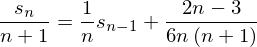

In [24]:
s = IndexedBase('s')
swaps_recurrence = Eq(s[n]/(n+1),s[n-1]/n + (2*n-3)/(6*n*(n+1)))
swaps_recurrence

In [25]:
swaps_recurrence_spec=dict(recurrence_eq=swaps_recurrence, indexed=s, index=n, terms_cache={})

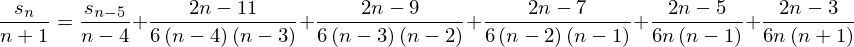

In [26]:
unfolded = do_unfolding_steps(swaps_recurrence_spec, 4)
recurrence_eq = project_recurrence_spec(unfolded, recurrence_eq=True)
recurrence_eq

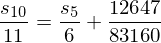

In [27]:
recurrence_eq.subs(n,10)

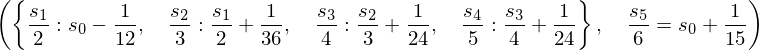

In [28]:
project_recurrence_spec(base_instantiation(unfolded), recurrence_eq=True, terms_cache=True)

### With boundary conditions

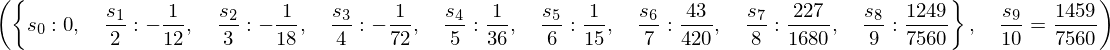

In [29]:
swaps_recurrence_spec=dict(recurrence_eq=swaps_recurrence, indexed=s, index=n, terms_cache={s[0]:Integer(0)})
unfolded = do_unfolding_steps(swaps_recurrence_spec, steps=8)
instantiated_rec_spec = base_instantiation(unfolded)
fully_instantiated_spec = repeated_instantiating(instantiated_rec_spec)
project_recurrence_spec(fully_instantiated_spec, recurrence_eq=True, terms_cache=True)

In [30]:
ipython_latex(swaps_recurrence_spec, times_range=range(10))

<IPython.core.display.Latex object>

## Fibonacci recurrence

A nice picture is [here][fibonacci-oeis].

[fibonacci-oeis]:http://oeis.org/A000045/a000045.html

### Backwards subscripts

#### Manually unfold $f_{n-1}$ according to $f_{n}=f_{n-1} + f_{n-2}$

In [31]:
f = IndexedBase('f')
fibonacci_recurrence = Eq(f[n],Add(f[n-2],f[n-3],f[n-2],evaluate=True))
fibonacci_recurrence

f[n] = f[n - 3] + 2⋅f[n - 2]

In [32]:
fibonacci_recurrence_spec=dict(recurrence_eq=fibonacci_recurrence, indexed=f, index=n, terms_cache={})
unfolded_one_step_fib_rec_spec = do_unfolding_steps(fibonacci_recurrence_spec, 0)
recurrence_eq = project_recurrence_spec(unfolded_one_step_fib_rec_spec, recurrence_eq=True)
recurrence_eq

f[n] = f[n - 3] + 2⋅f[n - 2]

In [33]:
ipython_latex(unfolded_one_step_fib_rec_spec, times_range=range(8), first_order=True)

<IPython.core.display.Latex object>

coefficients form a known triangle, [A013609][oeis].

[oeis]:http://oeis.org/A013609

In [34]:
project_recurrence_spec(unfolded_one_step_fib_rec_spec, terms_cache=True)

{f[n - 21]: f[n - 24] + 2⋅f[n - 23], f[n - 20]: f[n - 23] + 2⋅f[n - 22], f[n -
 19]: f[n - 22] + 2⋅f[n - 21], f[n - 18]: f[n - 21] + 2⋅f[n - 20], f[n - 17]: 
f[n - 20] + 2⋅f[n - 19], f[n - 16]: f[n - 19] + 2⋅f[n - 18], f[n - 15]: f[n - 
18] + 2⋅f[n - 17], f[n - 14]: f[n - 17] + 2⋅f[n - 16], f[n - 13]: f[n - 16] + 
2⋅f[n - 15], f[n - 12]: f[n - 15] + 2⋅f[n - 14], f[n - 11]: f[n - 14] + 2⋅f[n 
- 13], f[n - 10]: f[n - 13] + 2⋅f[n - 12], f[n - 9]: f[n - 12] + 2⋅f[n - 11], 
f[n - 8]: f[n - 11] + 2⋅f[n - 10], f[n - 7]: f[n - 10] + 2⋅f[n - 9], f[n - 6]:
 f[n - 9] + 2⋅f[n - 8], f[n - 5]: f[n - 8] + 2⋅f[n - 7], f[n - 4]: f[n - 7] + 
2⋅f[n - 6], f[n - 3]: f[n - 6] + 2⋅f[n - 5], f[n - 2]: f[n - 5] + 2⋅f[n - 4]}

In [35]:
subsumed_rec_specs = subsume_cache(unfolded_one_step_fib_rec_spec)
list(map(lambda spec: project_recurrence_spec(spec, recurrence_eq=True), subsumed_rec_specs))

[f[n] = f[n - 3] + 2⋅f[n - 2]]

In [36]:
# simply redo the previous defining cell in order to start fresh
fibonacci_recurrence_spec=dict(recurrence_eq=fibonacci_recurrence, indexed=f, index=n, terms_cache={})
unfolded_one_step_fib_rec_spec = do_unfolding_steps(fibonacci_recurrence_spec, 0)
recurrence_eq = project_recurrence_spec(unfolded_one_step_fib_rec_spec, recurrence_eq=True)
recurrence_eq

f[n] = f[n - 3] + 2⋅f[n - 2]

In [37]:
ipython_latex(unfolded_one_step_fib_rec_spec, times_range=range(4), first_order=False)

<IPython.core.display.Latex object>

In [38]:
project_recurrence_spec(unfolded_one_step_fib_rec_spec, terms_cache=True)

{f[n - 12]: f[n - 24] + 8⋅f[n - 23] + 24⋅f[n - 22] + 32⋅f[n - 21] + 16⋅f[n - 2
0], f[n - 11]: f[n - 23] + 8⋅f[n - 22] + 24⋅f[n - 21] + 32⋅f[n - 20] + 16⋅f[n 
- 19], f[n - 10]: f[n - 22] + 8⋅f[n - 21] + 24⋅f[n - 20] + 32⋅f[n - 19] + 16⋅f
[n - 18], f[n - 9]: f[n - 21] + 8⋅f[n - 20] + 24⋅f[n - 19] + 32⋅f[n - 18] + 16
⋅f[n - 17], f[n - 8]: f[n - 20] + 8⋅f[n - 19] + 24⋅f[n - 18] + 32⋅f[n - 17] + 
16⋅f[n - 16], f[n - 6]: f[n - 12] + 4⋅f[n - 11] + 4⋅f[n - 10], f[n - 5]: f[n -
 11] + 4⋅f[n - 10] + 4⋅f[n - 9], f[n - 4]: f[n - 10] + 4⋅f[n - 9] + 4⋅f[n - 8]
, f[n - 3]: f[n - 6] + 2⋅f[n - 5], f[n - 2]: f[n - 5] + 2⋅f[n - 4]}

In [39]:
subsumed_rec_specs = subsume_cache(unfolded_one_step_fib_rec_spec)
list(map(lambda spec: project_recurrence_spec(spec, recurrence_eq=True), subsumed_rec_specs))

[f[n] = f[n - 12] + 8⋅f[n - 11] + 24⋅f[n - 10] + 32⋅f[n - 9] + 16⋅f[n - 8], f[
n] = f[n - 6] + 4⋅f[n - 5] + 4⋅f[n - 4], f[n] = f[n - 3] + 2⋅f[n - 2]]

#### Manually unfold $f_{n-2}$ according to $f_{n}=f_{n-1} + f_{n-2}$

In [26]:
f = IndexedBase('f')
fibonacci_recurrence = Eq(f[n],Add(f[n-1],f[n-4],f[n-3],evaluate=True))
fibonacci_recurrence

f[n] = f[n - 4] + f[n - 3] + f[n - 1]

In [27]:
fibonacci_recurrence_spec=dict(recurrence_eq=fibonacci_recurrence, indexed=f, index=n, terms_cache={})
unfolded_one_step_fib_rec_spec = do_unfolding_steps(fibonacci_recurrence_spec, 0)
recurrence_eq = project_recurrence_spec(unfolded_one_step_fib_rec_spec, recurrence_eq=True)
recurrence_eq

f[n] = f[n - 4] + f[n - 3] + f[n - 1]

In [28]:
ipython_latex(unfolded_one_step_fib_rec_spec, times_range=range(8), first_order=True)

<IPython.core.display.Latex object>

In [29]:
project_recurrence_spec(unfolded_one_step_fib_rec_spec, terms_cache=True)

{f[n - 28]: f[n - 32] + f[n - 31] + f[n - 29], f[n - 27]: f[n - 31] + f[n - 30
] + f[n - 28], f[n - 26]: f[n - 30] + f[n - 29] + f[n - 27], f[n - 25]: f[n - 
29] + f[n - 28] + f[n - 26], f[n - 24]: f[n - 28] + f[n - 27] + f[n - 25], f[n
 - 23]: f[n - 27] + f[n - 26] + f[n - 24], f[n - 22]: f[n - 26] + f[n - 25] + 
f[n - 23], f[n - 21]: f[n - 25] + f[n - 24] + f[n - 22], f[n - 20]: f[n - 24] 
+ f[n - 23] + f[n - 21], f[n - 19]: f[n - 23] + f[n - 22] + f[n - 20], f[n - 1
8]: f[n - 22] + f[n - 21] + f[n - 19], f[n - 17]: f[n - 21] + f[n - 20] + f[n 
- 18], f[n - 16]: f[n - 20] + f[n - 19] + f[n - 17], f[n - 15]: f[n - 19] + f[
n - 18] + f[n - 16], f[n - 14]: f[n - 18] + f[n - 17] + f[n - 15], f[n - 13]: 
f[n - 17] + f[n - 16] + f[n - 14], f[n - 12]: f[n - 16] + f[n - 15] + f[n - 13
], f[n - 11]: f[n - 15] + f[n - 14] + f[n - 12], f[n - 10]: f[n - 14] + f[n - 
13] + f[n - 11], f[n - 9]: f[n - 13] + f[n - 12] + f[n - 10], f[n - 8]: f[n - 
12] + f[n - 11] + f[n - 9], f[n - 7]: f[n - 11] + f[

In [30]:
subsumed_rec_specs = subsume_cache(unfolded_one_step_fib_rec_spec)
list(map(lambda spec: project_recurrence_spec(spec, recurrence_eq=True), subsumed_rec_specs))

[f[n] = f[n - 4] + f[n - 3] + f[n - 1]]

In [14]:
# simply redo the previous defining cell in order to start fresh
fibonacci_recurrence_spec=dict(recurrence_eq=fibonacci_recurrence, indexed=f, index=n, terms_cache={})
unfolded_one_step_fib_rec_spec = do_unfolding_steps(fibonacci_recurrence_spec, 0)
recurrence_eq = project_recurrence_spec(unfolded_one_step_fib_rec_spec, recurrence_eq=True)
recurrence_eq

f[n] = f[n - 4] + f[n - 3] + f[n - 1]

In [15]:
ipython_latex(unfolded_one_step_fib_rec_spec, times_range=range(4), first_order=False)

<IPython.core.display.Latex object>

In [16]:
project_recurrence_spec(unfolded_one_step_fib_rec_spec, terms_cache=True)

{f[n - 16]: f[n - 32] + 4⋅f[n - 31] + 6⋅f[n - 30] + 8⋅f[n - 29] + 11⋅f[n - 28]
 + 8⋅f[n - 27] + 8⋅f[n - 26] + 8⋅f[n - 25] + 4⋅f[n - 24] + 6⋅f[n - 23] + 2⋅f[n
 - 22] + 2⋅f[n - 21] + f[n - 20], f[n - 15]: f[n - 31] + 4⋅f[n - 30] + 6⋅f[n -
 29] + 8⋅f[n - 28] + 11⋅f[n - 27] + 8⋅f[n - 26] + 8⋅f[n - 25] + 8⋅f[n - 24] + 
4⋅f[n - 23] + 6⋅f[n - 22] + 2⋅f[n - 21] + 2⋅f[n - 20] + f[n - 19], f[n - 14]: 
f[n - 30] + 4⋅f[n - 29] + 6⋅f[n - 28] + 8⋅f[n - 27] + 11⋅f[n - 26] + 8⋅f[n - 2
5] + 8⋅f[n - 24] + 8⋅f[n - 23] + 4⋅f[n - 22] + 6⋅f[n - 21] + 2⋅f[n - 20] + 2⋅f
[n - 19] + f[n - 18], f[n - 13]: f[n - 29] + 4⋅f[n - 28] + 6⋅f[n - 27] + 8⋅f[n
 - 26] + 11⋅f[n - 25] + 8⋅f[n - 24] + 8⋅f[n - 23] + 8⋅f[n - 22] + 4⋅f[n - 21] 
+ 6⋅f[n - 20] + 2⋅f[n - 19] + 2⋅f[n - 18] + f[n - 17], f[n - 12]: f[n - 28] + 
4⋅f[n - 27] + 6⋅f[n - 26] + 8⋅f[n - 25] + 11⋅f[n - 24] + 8⋅f[n - 23] + 8⋅f[n -
 22] + 8⋅f[n - 21] + 4⋅f[n - 20] + 6⋅f[n - 19] + 2⋅f[n - 18] + 2⋅f[n - 17] + f
[n - 16], f[n - 11]: f[n - 27] + 4⋅f[n - 26] + 6⋅f[n

In [25]:
subsumed_rec_specs = subsume_cache(unfolded_one_step_fib_rec_spec)
list(map(lambda spec: project_recurrence_spec(spec, recurrence_eq=True), subsumed_rec_specs))

[f[n] = f[n - 16] + 4⋅f[n - 15] + 6⋅f[n - 14] + 8⋅f[n - 13] + 11⋅f[n - 12] + 8
⋅f[n - 11] + 8⋅f[n - 10] + 8⋅f[n - 9] + 4⋅f[n - 8] + 6⋅f[n - 7] + 2⋅f[n - 6] +
 2⋅f[n - 5] + f[n - 4], f[n] = f[n - 8] + 2⋅f[n - 7] + f[n - 6] + 2⋅f[n - 5] +
 2⋅f[n - 4] + f[n - 2], f[n] = f[n - 4] + f[n - 3] + f[n - 1]]

#### Manually unfold both $f_{n-1}$ and $f_{n-2}$ according to $f_{n}=f_{n-1} + f_{n-2}$

In [40]:
f = IndexedBase('f')
fibonacci_recurrence = Eq(f[n],Add(f[n-3]+f[n-2],f[n-4],f[n-3],evaluate=False))
fibonacci_recurrence

f[n] = f[n - 3] + f[n - 2] + f[n - 4] + f[n - 3]

In [41]:
fibonacci_recurrence_spec=dict(recurrence_eq=fibonacci_recurrence, indexed=f, index=n, terms_cache={})
unfolded_one_step_fib_rec_spec = do_unfolding_steps(fibonacci_recurrence_spec, 0)
recurrence_eq = project_recurrence_spec(unfolded_one_step_fib_rec_spec, recurrence_eq=True)
recurrence_eq

f[n] = f[n - 3] + f[n - 2] + f[n - 4] + f[n - 3]

In [43]:
clear_cache()
ipython_latex(unfolded_one_step_fib_rec_spec, times_range=range(6), first_order=True)

<IPython.core.display.Latex object>

In [44]:
project_recurrence_spec(unfolded_one_step_fib_rec_spec, terms_cache=True)

{f[n - 20]: f[n - 24] + 2⋅f[n - 23] + f[n - 22], f[n - 19]: f[n - 23] + 2⋅f[n 
- 22] + f[n - 21], f[n - 18]: f[n - 22] + 2⋅f[n - 21] + f[n - 20], f[n - 17]: 
f[n - 21] + 2⋅f[n - 20] + f[n - 19], f[n - 16]: f[n - 20] + 2⋅f[n - 19] + f[n 
- 18], f[n - 15]: f[n - 19] + 2⋅f[n - 18] + f[n - 17], f[n - 14]: f[n - 18] + 
2⋅f[n - 17] + f[n - 16], f[n - 13]: f[n - 17] + 2⋅f[n - 16] + f[n - 15], f[n -
 12]: f[n - 16] + 2⋅f[n - 15] + f[n - 14], f[n - 11]: f[n - 15] + 2⋅f[n - 14] 
+ f[n - 13], f[n - 10]: f[n - 14] + 2⋅f[n - 13] + f[n - 12], f[n - 9]: f[n - 1
3] + 2⋅f[n - 12] + f[n - 11], f[n - 8]: f[n - 12] + 2⋅f[n - 11] + f[n - 10], f
[n - 7]: f[n - 11] + 2⋅f[n - 10] + f[n - 9], f[n - 6]: f[n - 10] + 2⋅f[n - 9] 
+ f[n - 8], f[n - 5]: f[n - 9] + 2⋅f[n - 8] + f[n - 7], f[n - 4]: f[n - 8] + 2
⋅f[n - 7] + f[n - 6], f[n - 3]: f[n - 7] + 2⋅f[n - 6] + f[n - 5], f[n - 2]: f[
n - 6] + 2⋅f[n - 5] + f[n - 4]}

In [45]:
subsumed_rec_specs = subsume_cache(unfolded_one_step_fib_rec_spec)
list(map(lambda spec: project_recurrence_spec(spec, recurrence_eq=True), subsumed_rec_specs))

[f[n] = f[n - 4] + 2⋅f[n - 3] + f[n - 2]]

In [46]:
# simply redo the previous defining cell in order to start fresh
fibonacci_recurrence_spec=dict(recurrence_eq=fibonacci_recurrence, indexed=f, index=n, terms_cache={})
unfolded_one_step_fib_rec_spec = do_unfolding_steps(fibonacci_recurrence_spec, 0)
recurrence_eq = project_recurrence_spec(unfolded_one_step_fib_rec_spec, recurrence_eq=True)
recurrence_eq

f[n] = f[n - 3] + f[n - 2] + f[n - 4] + f[n - 3]

In [47]:
ipython_latex(unfolded_one_step_fib_rec_spec, times_range=range(4), first_order=False)

<IPython.core.display.Latex object>

curiously, triangle of coefficients *isn't* symmetric as the one above.

In [48]:
project_recurrence_spec(unfolded_one_step_fib_rec_spec, terms_cache=True)

{f[n - 16]: f[n - 32] + 8⋅f[n - 31] + 28⋅f[n - 30] + 56⋅f[n - 29] + 69⋅f[n - 2
8] + 52⋅f[n - 27] + 22⋅f[n - 26] + 4⋅f[n - 25] + f[n - 24] + 2⋅f[n - 23] + f[n
 - 22], f[n - 15]: f[n - 31] + 8⋅f[n - 30] + 28⋅f[n - 29] + 56⋅f[n - 28] + 69⋅
f[n - 27] + 52⋅f[n - 26] + 22⋅f[n - 25] + 4⋅f[n - 24] + f[n - 23] + 2⋅f[n - 22
] + f[n - 21], f[n - 14]: f[n - 30] + 8⋅f[n - 29] + 28⋅f[n - 28] + 56⋅f[n - 27
] + 69⋅f[n - 26] + 52⋅f[n - 25] + 22⋅f[n - 24] + 4⋅f[n - 23] + f[n - 22] + 2⋅f
[n - 21] + f[n - 20], f[n - 13]: f[n - 29] + 8⋅f[n - 28] + 28⋅f[n - 27] + 56⋅f
[n - 26] + 69⋅f[n - 25] + 52⋅f[n - 24] + 22⋅f[n - 23] + 4⋅f[n - 22] + f[n - 21
] + 2⋅f[n - 20] + f[n - 19], f[n - 12]: f[n - 28] + 8⋅f[n - 27] + 28⋅f[n - 26]
 + 56⋅f[n - 25] + 69⋅f[n - 24] + 52⋅f[n - 23] + 22⋅f[n - 22] + 4⋅f[n - 21] + f
[n - 20] + 2⋅f[n - 19] + f[n - 18], f[n - 11]: f[n - 27] + 8⋅f[n - 26] + 28⋅f[
n - 25] + 56⋅f[n - 24] + 69⋅f[n - 23] + 52⋅f[n - 22] + 22⋅f[n - 21] + 4⋅f[n - 
20] + f[n - 19] + 2⋅f[n - 18] + f[n - 17], f[n - 10]

In [49]:
subsumed_rec_specs = subsume_cache(unfolded_one_step_fib_rec_spec)
list(map(lambda spec: project_recurrence_spec(spec, recurrence_eq=True), subsumed_rec_specs))

[f[n] = f[n - 16] + 8⋅f[n - 15] + 28⋅f[n - 14] + 56⋅f[n - 13] + 69⋅f[n - 12] +
 52⋅f[n - 11] + 22⋅f[n - 10] + 4⋅f[n - 9] + f[n - 8] + 2⋅f[n - 7] + f[n - 6], 
f[n] = f[n - 8] + 4⋅f[n - 7] + 6⋅f[n - 6] + 4⋅f[n - 5] + f[n - 4], f[n] = f[n 
- 4] + 2⋅f[n - 3] + f[n - 2]]

### Using *second order* unfolding

In [36]:
clear_cache()

In [37]:
f = IndexedBase('f')
fibonacci_recurrence = Eq(f[n], f[n-1]+f[n-2])
fibonacci_recurrence

f[n] = f[n - 2] + f[n - 1]

In [38]:
fibonacci_recurrence_spec=dict(recurrence_eq=fibonacci_recurrence, indexed=f, index=n, terms_cache={})

In [39]:
unfolded = do_unfolding_steps(fibonacci_recurrence_spec, 3, first_order=False)
recurrence_eq = project_recurrence_spec(unfolded, recurrence_eq=True)
recurrence_eq

f[n] = f[n - 15] + 4⋅f[n - 14] + 5⋅f[n - 13] + 2⋅f[n - 12] + f[n - 11] + f[n -
 10] + 2⋅f[n - 14] + 8⋅f[n - 13] + 10⋅f[n - 12] + 4⋅f[n - 11] + 2⋅f[n - 10] + 
2⋅f[n - 9] + f[n - 13] + 4⋅f[n - 12] + 5⋅f[n - 11] + 2⋅f[n - 10] + f[n - 9] + 
f[n - 8] + f[n - 8] + 2⋅f[n - 7] + f[n - 6] + f[n - 7] + 2⋅f[n - 6] + f[n - 5]
 + 2⋅f[n - 15] + 8⋅f[n - 14] + 10⋅f[n - 13] + 4⋅f[n - 12] + 2⋅f[n - 11] + 2⋅f[
n - 10] + f[n - 16] + 4⋅f[n - 15] + 5⋅f[n - 14] + 2⋅f[n - 13] + f[n - 12] + f[
n - 11] + f[n - 14] + 4⋅f[n - 13] + 5⋅f[n - 12] + 2⋅f[n - 11] + f[n - 10] + f[
n - 9] + 2⋅f[n - 14] + 8⋅f[n - 13] + 10⋅f[n - 12] + 4⋅f[n - 11] + 2⋅f[n - 10] 
+ 2⋅f[n - 9] + f[n - 15] + 4⋅f[n - 14] + 5⋅f[n - 13] + 2⋅f[n - 12] + f[n - 11]
 + f[n - 10] + f[n - 13] + 4⋅f[n - 12] + 5⋅f[n - 11] + 2⋅f[n - 10] + f[n - 9] 
+ f[n - 8]

In [40]:
factored_recurrence_eq = project_recurrence_spec(factor_rhs_unfolded_rec(unfolded), recurrence_eq=True)
factored_recurrence_eq

f[n] = f[n - 16] + 8⋅f[n - 15] + 26⋅f[n - 14] + 44⋅f[n - 13] + 42⋅f[n - 12] + 
25⋅f[n - 11] + 13⋅f[n - 10] + 7⋅f[n - 9] + 3⋅f[n - 8] + 3⋅f[n - 7] + 3⋅f[n - 6
] + f[n - 5]

In [56]:
factored_recurrence_eq.subs(n, 16)

f[16] = f[0] + 8⋅f[1] + 26⋅f[2] + 44⋅f[3] + 42⋅f[4] + 25⋅f[5] + 13⋅f[6] + 7⋅f[
7] + 3⋅f[8] + 3⋅f[9] + 3⋅f[10] + f[11]

In [57]:
project_recurrence_spec(base_instantiation(unfolded), recurrence_eq=True)

f[16] = f[0] + 8⋅f[1] + 26⋅f[2] + 44⋅f[3] + 42⋅f[4] + 25⋅f[5] + 13⋅f[6] + 7⋅f[
7] + 3⋅f[8] + 3⋅f[9] + 3⋅f[10] + f[11]

In [58]:
project_recurrence_spec(base_instantiation(unfolded), terms_cache=True)

{f[8]: f[0] + 4⋅f[1] + 5⋅f[2] + 2⋅f[3] + f[4] + f[5], f[9]: f[1] + 4⋅f[2] + 5⋅
f[3] + 2⋅f[4] + f[5] + f[6], f[10]: f[2] + 4⋅f[3] + 5⋅f[4] + 2⋅f[5] + f[6] + f
[7], f[11]: f[3] + 4⋅f[4] + 5⋅f[5] + 2⋅f[6] + f[7] + f[8], f[12]: f[8] + 2⋅f[9
] + f[10], f[13]: f[9] + 2⋅f[10] + f[11], f[14]: f[12] + f[13], f[15]: f[13] +
 f[14]}

In [59]:
ipython_latex(fibonacci_recurrence_spec, times_range=range(5), first_order=False)

<IPython.core.display.Latex object>

In [51]:
rows=5
mapped = map(lambda rec_spec: project_recurrence_spec(rec_spec, recurrence_eq=True), 
         times_higher_order_operator(fibonacci_recurrence_spec, 
                                     operator=lambda processed_spec, steps: processed_spec,
                                     instantiate=False,
                                     first_order=False,
                                     times_range=range(rows)))
mapped = list(mapped)
mapped

[f[n] = f[n - 2] + f[n - 1], f[n] = f[n - 4] + 2⋅f[n - 3] + f[n - 2], f[n] = f
[n - 8] + 4⋅f[n - 7] + 5⋅f[n - 6] + 2⋅f[n - 5] + f[n - 4] + f[n - 3], f[n] = f
[n - 16] + 8⋅f[n - 15] + 26⋅f[n - 14] + 44⋅f[n - 13] + 42⋅f[n - 12] + 25⋅f[n -
 11] + 13⋅f[n - 10] + 7⋅f[n - 9] + 3⋅f[n - 8] + 3⋅f[n - 7] + 3⋅f[n - 6] + f[n 
- 5], f[n] = f[n - 32] + 16⋅f[n - 31] + 116⋅f[n - 30] + 504⋅f[n - 29] + 1464⋅f
[n - 28] + 3010⋅f[n - 27] + 4546⋅f[n - 26] + 5218⋅f[n - 25] + 4755⋅f[n - 24] +
 3635⋅f[n - 23] + 2438⋅f[n - 22] + 1473⋅f[n - 21] + 863⋅f[n - 20] + 541⋅f[n - 
19] + 333⋅f[n - 18] + 177⋅f[n - 17] + 88⋅f[n - 16] + 49⋅f[n - 15] + 37⋅f[n - 1
4] + 34⋅f[n - 13] + 28⋅f[n - 12] + 17⋅f[n - 11] + 8⋅f[n - 10] + 4⋅f[n - 9] + f
[n - 8]]

In [52]:
fib_shitf_8back = Eq(f[n], f[n-8]+4*f[n-7]+5*f[n-6]+2*f[n-5]+f[n-4]+f[n-3])
fib_shitf_8back

f[n] = f[n - 8] + 4⋅f[n - 7] + 5⋅f[n - 6] + 2⋅f[n - 5] + f[n - 4] + f[n - 3]

In [53]:
[fib_shitf_8back.subs(n,i) for i in range(8,32)]

[f[8] = f[0] + 4⋅f[1] + 5⋅f[2] + 2⋅f[3] + f[4] + f[5], f[9] = f[1] + 4⋅f[2] + 
5⋅f[3] + 2⋅f[4] + f[5] + f[6], f[10] = f[2] + 4⋅f[3] + 5⋅f[4] + 2⋅f[5] + f[6] 
+ f[7], f[11] = f[3] + 4⋅f[4] + 5⋅f[5] + 2⋅f[6] + f[7] + f[8], f[12] = f[4] + 
4⋅f[5] + 5⋅f[6] + 2⋅f[7] + f[8] + f[9], f[13] = f[5] + 4⋅f[6] + 5⋅f[7] + 2⋅f[8
] + f[9] + f[10], f[14] = f[6] + 4⋅f[7] + 5⋅f[8] + 2⋅f[9] + f[10] + f[11], f[1
5] = f[7] + 4⋅f[8] + 5⋅f[9] + 2⋅f[10] + f[11] + f[12], f[16] = f[8] + 4⋅f[9] +
 5⋅f[10] + 2⋅f[11] + f[12] + f[13], f[17] = f[9] + 4⋅f[10] + 5⋅f[11] + 2⋅f[12]
 + f[13] + f[14], f[18] = f[10] + 4⋅f[11] + 5⋅f[12] + 2⋅f[13] + f[14] + f[15],
 f[19] = f[11] + 4⋅f[12] + 5⋅f[13] + 2⋅f[14] + f[15] + f[16], f[20] = f[12] + 
4⋅f[13] + 5⋅f[14] + 2⋅f[15] + f[16] + f[17], f[21] = f[13] + 4⋅f[14] + 5⋅f[15]
 + 2⋅f[16] + f[17] + f[18], f[22] = f[14] + 4⋅f[15] + 5⋅f[16] + 2⋅f[17] + f[18
] + f[19], f[23] = f[15] + 4⋅f[16] + 5⋅f[17] + 2⋅f[18] + f[19] + f[20], f[24] 
= f[16] + 4⋅f[17] + 5⋅f[18] + 2⋅f[19] + f[20] + f[21

In [55]:
def accumulating(acc, current): return Eq(acc.lhs + current.lhs, acc.rhs + current.rhs)
list(accumulate(mapped, accumulating))

[f[n] = f[n - 2] + f[n - 1], 2⋅f[n] = f[n - 4] + 2⋅f[n - 3] + 2⋅f[n - 2] + f[n
 - 1], 3⋅f[n] = f[n - 8] + 4⋅f[n - 7] + 5⋅f[n - 6] + 2⋅f[n - 5] + 2⋅f[n - 4] +
 3⋅f[n - 3] + 2⋅f[n - 2] + f[n - 1], 4⋅f[n] = f[n - 16] + 8⋅f[n - 15] + 26⋅f[n
 - 14] + 44⋅f[n - 13] + 42⋅f[n - 12] + 25⋅f[n - 11] + 13⋅f[n - 10] + 7⋅f[n - 9
] + 4⋅f[n - 8] + 7⋅f[n - 7] + 8⋅f[n - 6] + 3⋅f[n - 5] + 2⋅f[n - 4] + 3⋅f[n - 3
] + 2⋅f[n - 2] + f[n - 1], 5⋅f[n] = f[n - 32] + 16⋅f[n - 31] + 116⋅f[n - 30] +
 504⋅f[n - 29] + 1464⋅f[n - 28] + 3010⋅f[n - 27] + 4546⋅f[n - 26] + 5218⋅f[n -
 25] + 4755⋅f[n - 24] + 3635⋅f[n - 23] + 2438⋅f[n - 22] + 1473⋅f[n - 21] + 863
⋅f[n - 20] + 541⋅f[n - 19] + 333⋅f[n - 18] + 177⋅f[n - 17] + 89⋅f[n - 16] + 57
⋅f[n - 15] + 63⋅f[n - 14] + 78⋅f[n - 13] + 70⋅f[n - 12] + 42⋅f[n - 11] + 21⋅f[
n - 10] + 11⋅f[n - 9] + 5⋅f[n - 8] + 7⋅f[n - 7] + 8⋅f[n - 6] + 3⋅f[n - 5] + 2⋅
f[n - 4] + 3⋅f[n - 3] + 2⋅f[n - 2] + f[n - 1]]

In [60]:
cached_terms = project_recurrence_spec(fibonacci_recurrence_spec, terms_cache=True)
cached_terms

{f[n - 16]: f[n - 32] + 8⋅f[n - 31] + 26⋅f[n - 30] + 44⋅f[n - 29] + 42⋅f[n - 2
8] + 25⋅f[n - 27] + 13⋅f[n - 26] + 7⋅f[n - 25] + 3⋅f[n - 24] + 3⋅f[n - 23] + 3
⋅f[n - 22] + f[n - 21], f[n - 15]: f[n - 31] + 8⋅f[n - 30] + 26⋅f[n - 29] + 44
⋅f[n - 28] + 42⋅f[n - 27] + 25⋅f[n - 26] + 13⋅f[n - 25] + 7⋅f[n - 24] + 3⋅f[n 
- 23] + 3⋅f[n - 22] + 3⋅f[n - 21] + f[n - 20], f[n - 14]: f[n - 30] + 8⋅f[n - 
29] + 26⋅f[n - 28] + 44⋅f[n - 27] + 42⋅f[n - 26] + 25⋅f[n - 25] + 13⋅f[n - 24]
 + 7⋅f[n - 23] + 3⋅f[n - 22] + 3⋅f[n - 21] + 3⋅f[n - 20] + f[n - 19], f[n - 13
]: f[n - 29] + 8⋅f[n - 28] + 26⋅f[n - 27] + 44⋅f[n - 26] + 42⋅f[n - 25] + 25⋅f
[n - 24] + 13⋅f[n - 23] + 7⋅f[n - 22] + 3⋅f[n - 21] + 3⋅f[n - 20] + 3⋅f[n - 19
] + f[n - 18], f[n - 12]: f[n - 28] + 8⋅f[n - 27] + 26⋅f[n - 26] + 44⋅f[n - 25
] + 42⋅f[n - 24] + 25⋅f[n - 23] + 13⋅f[n - 22] + 7⋅f[n - 21] + 3⋅f[n - 20] + 3
⋅f[n - 19] + 3⋅f[n - 18] + f[n - 17], f[n - 11]: f[n - 27] + 8⋅f[n - 26] + 26⋅
f[n - 25] + 44⋅f[n - 24] + 42⋅f[n - 23] + 25⋅f[n - 2

In [61]:
subsumed_rec_specs = subsume_cache(fibonacci_recurrence_spec)
list(map(lambda spec: project_recurrence_spec(spec, recurrence_eq=True), subsumed_rec_specs))

[f[n] = f[n - 2] + f[n - 1], f[n] = f[n - 8] + 4⋅f[n - 7] + 5⋅f[n - 6] + 2⋅f[n
 - 5] + f[n - 4] + f[n - 3], f[n] = f[n - 4] + 2⋅f[n - 3] + f[n - 2], f[n] = f
[n - 16] + 8⋅f[n - 15] + 26⋅f[n - 14] + 44⋅f[n - 13] + 42⋅f[n - 12] + 25⋅f[n -
 11] + 13⋅f[n - 10] + 7⋅f[n - 9] + 3⋅f[n - 8] + 3⋅f[n - 7] + 3⋅f[n - 6] + f[n 
- 5]]

In [47]:
fibs = {f[i]:fibonacci(i) for i in range(0,51)}
fibs

{f[0]: 0, f[1]: 1, f[2]: 1, f[3]: 2, f[4]: 3, f[5]: 5, f[6]: 8, f[7]: 13, f[8]
: 21, f[9]: 34, f[10]: 55, f[11]: 89, f[12]: 144, f[13]: 233, f[14]: 377, f[15
]: 610, f[16]: 987, f[17]: 1597, f[18]: 2584, f[19]: 4181, f[20]: 6765, f[21]:
 10946, f[22]: 17711, f[23]: 28657, f[24]: 46368, f[25]: 75025, f[26]: 121393,
 f[27]: 196418, f[28]: 317811, f[29]: 514229, f[30]: 832040, f[31]: 1346269, f
[32]: 2178309, f[33]: 3524578, f[34]: 5702887, f[35]: 9227465, f[36]: 14930352
, f[37]: 24157817, f[38]: 39088169, f[39]: 63245986, f[40]: 102334155, f[41]: 
165580141, f[42]: 267914296, f[43]: 433494437, f[44]: 701408733, f[45]: 113490
3170, f[46]: 1836311903, f[47]: 2971215073, f[48]: 4807526976, f[49]: 77787420
49, f[50]: 12586269025}

In [63]:
fib_term = f[n-5]
fib_eq = Eq(fib_term,cached_terms[fib_term])
fib_eq

f[n - 5] = f[n - 13] + 4⋅f[n - 12] + 5⋅f[n - 11] + 2⋅f[n - 10] + f[n - 9] + f[
n - 8]

In [64]:
instantiated_eq = fib_eq.subs({n:50})
instantiated_eq

f[45] = f[37] + 4⋅f[38] + 5⋅f[39] + 2⋅f[40] + f[41] + f[42]

In [65]:
instantiated_eq.subs(fibs)

True

In [66]:
maybe_fib = Eq(f[n],f[n-8]+4*f[n-7]+6*f[n-6]+4*f[n-5]+f[n-4])
maybe_fib

f[n] = f[n - 8] + 4⋅f[n - 7] + 6⋅f[n - 6] + 4⋅f[n - 5] + f[n - 4]

In [67]:
maybe_fib_instantiated = maybe_fib.subs({n:45})
maybe_fib_instantiated

f[45] = f[37] + 4⋅f[38] + 6⋅f[39] + 4⋅f[40] + f[41]

In [68]:
maybe_fib_instantiated.subs(fibs)

True

In [69]:
maybe_fib_instantiated = maybe_fib.subs({n:28})
maybe_fib_instantiated

f[28] = f[20] + 4⋅f[21] + 6⋅f[22] + 4⋅f[23] + f[24]

In [70]:
maybe_fib_instantiated.subs(fibs)

True

In [71]:
maybe_fib = Eq(f[n],f[n-16]+8*f[n-15]+28*f[n-14]+56*f[n-13]+70*f[n-12]+
               f[n-8]+8*f[n-9]+28*f[n-10]+56*f[n-11])
maybe_fib

f[n] = f[n - 16] + 8⋅f[n - 15] + 28⋅f[n - 14] + 56⋅f[n - 13] + 70⋅f[n - 12] + 
56⋅f[n - 11] + 28⋅f[n - 10] + 8⋅f[n - 9] + f[n - 8]

In [72]:
maybe_fib_instantiated = maybe_fib.subs({n:28})
maybe_fib_instantiated

f[28] = f[12] + 8⋅f[13] + 28⋅f[14] + 56⋅f[15] + 70⋅f[16] + 56⋅f[17] + 28⋅f[18]
 + 8⋅f[19] + f[20]

In [73]:
maybe_fib_instantiated.subs(fibs)

True

### An generalization attempt

In [17]:
%run "sums.py"

In [18]:
def expand_sum_in_eq(eq_term):
    lhs, rhs = eq_term.lhs, eq_term.rhs
    return Eq(lhs, expand_Sum(rhs))

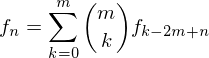

In [28]:
m = symbols('m')
thm = Eq(f[n], Sum(binomial(m,k)*f[n-2*m+k], (k,0,m)))
thm

In [29]:
expanded_eq = expand_sum_in_eq(thm.subs({m:20}))
expanded_eq

In [31]:
subsed = expanded_eq.subs(n, 40)
subsed

In [32]:
subsed.subs(fibs)

### Forward subscripts

In [56]:
clear_cache()

In [57]:
f = IndexedBase('f')
fibonacci_recurrence = Eq(f[n+2],f[n+1]+f[n])
fibonacci_recurrence

f[n + 2] = f[n] + f[n + 1]

In [58]:
boundary_conditions = {f[0]:Integer(0), f[1]:Integer(1)}
fibonacci_recurrence_spec=dict(recurrence_eq=fibonacci_recurrence, indexed=f, 
                               index=n, terms_cache=boundary_conditions)

In [25]:
unfolded = do_unfolding_steps(fibonacci_recurrence_spec, 5)

In [26]:
recurrence_eq = project_recurrence_spec(unfolded, recurrence_eq=True)
recurrence_eq

f[n + 2] = f[n - 9] + f[n - 8] + f[n - 8] + f[n - 7] + f[n - 8] + f[n - 7] + f
[n - 7] + f[n - 6] + f[n - 8] + f[n - 7] + f[n - 7] + f[n - 6] + f[n - 7] + f[
n - 6] + f[n - 6] + f[n - 5] + f[n - 10] + f[n - 9] + f[n - 9] + f[n - 8] + f[
n - 9] + f[n - 8] + f[n - 8] + f[n - 7] + f[n - 9] + f[n - 8] + f[n - 8] + f[n
 - 7] + f[n - 8] + f[n - 7] + f[n - 7] + f[n - 6] + f[n - 7] + f[n - 6] + f[n 
- 6] + f[n - 5] + f[n - 6] + f[n - 5] + f[n - 5] + f[n - 4] + f[n - 8] + f[n -
 7] + f[n - 7] + f[n - 6] + f[n - 7] + f[n - 6] + f[n - 6] + f[n - 5] + f[n - 
9] + f[n - 8] + f[n - 8] + f[n - 7] + f[n - 8] + f[n - 7] + f[n - 7] + f[n - 6
] + f[n - 8] + f[n - 7] + f[n - 7] + f[n - 6] + f[n - 7] + f[n - 6] + f[n - 6]
 + f[n - 5]

In [27]:
factored_recurrence_eq = project_recurrence_spec(factor_rhs_unfolded_rec(unfolded), recurrence_eq=True)
factored_recurrence_eq

f[n + 2] = f[n - 10] + 6⋅f[n - 9] + 15⋅f[n - 8] + 20⋅f[n - 7] + 15⋅f[n - 6] + 
6⋅f[n - 5] + f[n - 4]

In [28]:
factored_recurrence_eq.subs(n,10)

f[12] = f[0] + 6⋅f[1] + 15⋅f[2] + 20⋅f[3] + 15⋅f[4] + 6⋅f[5] + f[6]

In [29]:
instantiated_rec_spec = base_instantiation(unfolded)

In [30]:
project_recurrence_spec(instantiated_rec_spec, recurrence_eq=True, terms_cache=True)

({f[0]: 0, f[1]: 1, f[2]: f[0] + f[1], f[3]: f[1] + f[2], f[4]: f[2] + f[3], f
[5]: f[3] + f[4], f[6]: f[4] + f[5], f[7]: f[5] + f[6], f[8]: f[6] + f[7], f[9
]: f[7] + f[8], f[10]: f[8] + f[9], f[11]: f[9] + f[10]}, f[12] = f[0] + 6⋅f[1
] + 15⋅f[2] + 20⋅f[3] + 15⋅f[4] + 6⋅f[5] + f[6])

In [31]:
fully_instantiated_spec = repeated_instantiating(instantiated_rec_spec)
project_recurrence_spec(fully_instantiated_spec, recurrence_eq=True, terms_cache=True)

({f[0]: 0, f[1]: 1, f[2]: 1, f[3]: 2, f[4]: 3, f[5]: 5, f[6]: 8, f[7]: 13, f[8
]: 21, f[9]: 34, f[10]: 55, f[11]: 89}, f[12] = 144)

In [31]:
ipython_latex(fibonacci_recurrence_spec, times_range=range(13))

<IPython.core.display.Latex object>

In [13]:
project_recurrence_spec(fibonacci_recurrence_spec, terms_cache=True)

In [59]:
rows=10
mapped = map(lambda rec_spec: project_recurrence_spec(rec_spec, recurrence_eq=True), 
         times_higher_order_operator(fibonacci_recurrence_spec, 
                                     operator=lambda processed_spec, steps: processed_spec,
                                     instantiate=False,
                                     times_range=range(rows)))
mapped = list(mapped)
mapped

[f[n + 2] = f[n] + f[n + 1], f[n + 2] = f[n] + f[n - 2] + 2⋅f[n - 1], f[n + 2]
 = f[n - 4] + 3⋅f[n - 3] + 3⋅f[n - 2] + f[n - 1], f[n + 2] = f[n - 6] + 4⋅f[n 
- 5] + 6⋅f[n - 4] + 4⋅f[n - 3] + f[n - 2], f[n + 2] = f[n - 8] + 5⋅f[n - 7] + 
10⋅f[n - 6] + 10⋅f[n - 5] + 5⋅f[n - 4] + f[n - 3], f[n + 2] = f[n - 10] + 6⋅f[
n - 9] + 15⋅f[n - 8] + 20⋅f[n - 7] + 15⋅f[n - 6] + 6⋅f[n - 5] + f[n - 4], f[n 
+ 2] = f[n - 12] + 7⋅f[n - 11] + 21⋅f[n - 10] + 35⋅f[n - 9] + 35⋅f[n - 8] + 21
⋅f[n - 7] + 7⋅f[n - 6] + f[n - 5], f[n + 2] = f[n - 14] + 8⋅f[n - 13] + 28⋅f[n
 - 12] + 56⋅f[n - 11] + 70⋅f[n - 10] + 56⋅f[n - 9] + 28⋅f[n - 8] + 8⋅f[n - 7] 
+ f[n - 6], f[n + 2] = f[n - 16] + 9⋅f[n - 15] + 36⋅f[n - 14] + 84⋅f[n - 13] +
 126⋅f[n - 12] + 126⋅f[n - 11] + 84⋅f[n - 10] + 36⋅f[n - 9] + 9⋅f[n - 8] + f[n
 - 7], f[n + 2] = f[n - 18] + 10⋅f[n - 17] + 45⋅f[n - 16] + 120⋅f[n - 15] + 21
0⋅f[n - 14] + 252⋅f[n - 13] + 210⋅f[n - 12] + 120⋅f[n - 11] + 45⋅f[n - 10] + 1
0⋅f[n - 9] + f[n - 8]]

In [61]:
list(accumulate(mapped, accumulating))

[f[n + 2] = f[n] + f[n + 1], 2⋅f[n + 2] = 2⋅f[n] + f[n - 2] + 2⋅f[n - 1] + f[n
 + 1], 3⋅f[n + 2] = 2⋅f[n] + f[n - 4] + 3⋅f[n - 3] + 4⋅f[n - 2] + 3⋅f[n - 1] +
 f[n + 1], 4⋅f[n + 2] = 2⋅f[n] + f[n - 6] + 4⋅f[n - 5] + 7⋅f[n - 4] + 7⋅f[n - 
3] + 5⋅f[n - 2] + 3⋅f[n - 1] + f[n + 1], 5⋅f[n + 2] = 2⋅f[n] + f[n - 8] + 5⋅f[
n - 7] + 11⋅f[n - 6] + 14⋅f[n - 5] + 12⋅f[n - 4] + 8⋅f[n - 3] + 5⋅f[n - 2] + 3
⋅f[n - 1] + f[n + 1], 6⋅f[n + 2] = 2⋅f[n] + f[n - 10] + 6⋅f[n - 9] + 16⋅f[n - 
8] + 25⋅f[n - 7] + 26⋅f[n - 6] + 20⋅f[n - 5] + 13⋅f[n - 4] + 8⋅f[n - 3] + 5⋅f[
n - 2] + 3⋅f[n - 1] + f[n + 1], 7⋅f[n + 2] = 2⋅f[n] + f[n - 12] + 7⋅f[n - 11] 
+ 22⋅f[n - 10] + 41⋅f[n - 9] + 51⋅f[n - 8] + 46⋅f[n - 7] + 33⋅f[n - 6] + 21⋅f[
n - 5] + 13⋅f[n - 4] + 8⋅f[n - 3] + 5⋅f[n - 2] + 3⋅f[n - 1] + f[n + 1], 8⋅f[n 
+ 2] = 2⋅f[n] + f[n - 14] + 8⋅f[n - 13] + 29⋅f[n - 12] + 63⋅f[n - 11] + 92⋅f[n
 - 10] + 97⋅f[n - 9] + 79⋅f[n - 8] + 54⋅f[n - 7] + 34⋅f[n - 6] + 21⋅f[n - 5] +
 13⋅f[n - 4] + 8⋅f[n - 3] + 5⋅f[n - 2] + 3⋅f[n - 1] 

According to [A162741][oeis], we can generalize the pattern above:

[oeis]:http://oeis.org/A162741

In [75]:
i = symbols('i')
d = IndexedBase('d')
k_fn_gen = Eq((k+1)*f[n], Sum(d[k,2*k-i]*f[n-i], (i, 0, 2*k)))
d_triangle= {d[0,0]:1, d[n,2*n]:1, d[n,k]:d[n-1, k-1]+d[n-1,k]}
k_fn_gen, d_triangle

⎛                2⋅k                                                          
⎜                ___                                                          
⎜                ╲                                                            
⎜                 ╲   f[-i + n]⋅d[k, -i + 2*k]                                
⎜(k + 1)⋅f[n] =   ╱                           , {d[0, 0]: 1, d[n, k]: d[n - 1,
⎜                ╱                                                            
⎜                ‾‾‾                                                          
⎝               i = 0                                                         

                                    ⎞
                                    ⎟
                                    ⎟
                                    ⎟
 k] + d[n - 1, k - 1], d[n, 2*n]: 1}⎟
                                    ⎟
                                    ⎟
                                    ⎠

#### looking at bottom left to top right diagonal sums
Another well known recurrence about those numbers involving Pascal triangle is the following: 
$$ f_{n+1} = \sum_{k\geq 0}{{{n-k}\choose{k}}}$$
namely, a fibonacci number equals the sum in diagonals. Here we do something similar...

In [17]:
f2_diag = f[0]
f2_diag, f2_diag.subs(fibs)

In [18]:
f4_diag = f[0]+f[1]
f4_diag, f4_diag.subs(fibs)

In [19]:
f6_diag = f[0]+2*f[1]
f6_diag, f6_diag.subs(fibs)

In [20]:
f8_diag = f[0]+3*f[1]+f[2]
f8_diag, f8_diag.subs(fibs)

In [21]:
f10_diag = f[0]+4*f[1]+3*f[2]
f10_diag, f10_diag.subs(fibs)

In [22]:
f12_diag = f[0]+5*f[1]+6*f[2]+f[3]
f12_diag, f12_diag.subs(fibs)

In [23]:
f14_diag = f[0]+6*f[1]+10*f[2]+4*f[3]
f14_diag, f14_diag.subs(fibs)

In [24]:
f16_diag = f[0]+7*f[1]+15*f[2]+10*f[3]+f[4]
f16_diag, f16_diag.subs(fibs)

In [25]:
f18_diag = f[0]+8*f[1]+21*f[2]+20*f[3]+5*f[4]
f18_diag, f18_diag.subs(fibs)

In [26]:
f20_diag = f[0]+9*f[1]+28*f[2]+35*f[3]+15*f[4]+f[5]
f20_diag, f20_diag.subs(fibs)

In [27]:
f22_diag = f[0]+10*f[1]+36*f[2]+56*f[3]+35*f[4]+6*f[5]
f22_diag, f22_diag.subs(fibs)

In [28]:
f24_diag = f[0]+11*f[1]+45*f[2]+84*f[3]+70*f[4]+21*f[5]+f[6]
f24_diag, f24_diag.subs(fibs)

In [32]:
f26_diag = f[0]+12*f[1]+55*f[2]+120*f[3]+126*f[4]+56*f[5]+7*f[6]
f26_diag, f26_diag.subs(fibs)

which is [A059633][oeis]. According to the reference, the sequence is built by the following recurrence: $$a_{n} = 2a_{n-1}-a_{n-3}+a_{n-4}$$
It seems there's a curious correspondence among coefficients in the recurrence and coefficients in the gf...

[oeis]:http://oeis.org/A059633

In [38]:
def A059633_gf(x): return 1/(1-2*x+x**3-x**4)

A059633_gf(t).series(t,n=14)

In [39]:
def fib_gf(t): return 1/(1-t-t**2)

fib_gf(t).series(t, n=14)

### Another characterization of $f_{2n+1}, \forall n \in\mathbb{N}$

In [11]:
def do_memberwise_on_eqs(an_eq, another_eq, operator=lambda x, y: Add(x,y,evaluate=True)):
    return Eq(operator(an_eq.lhs, another_eq.lhs), operator(an_eq.rhs, another_eq.rhs))

def swap_eq(eq_term): return Eq(eq_term.rhs, eq_term.lhs)

In [12]:
rows=10
mapped = map(lambda rec_spec: project_recurrence_spec(rec_spec[0], recurrence_eq=True), 
         times_higher_order_operator(fibonacci_recurrence_spec, times_range=range(rows)))
mapped

In [13]:
mapped=list(mapped)
mapped

In [14]:
reduce(do_memberwise_on_eqs, mapped)

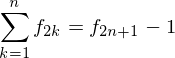

In [15]:
#even_subscript_fibonacci_eq = Eq(Sum(f[2*k],(k,0,n)), f[2*n+1]-1)
even_subscript_fibonacci_eq = Eq(Sum(f[2*k],(k,1,n)), f[2*n+1]-1)
even_subscript_fibonacci_eq

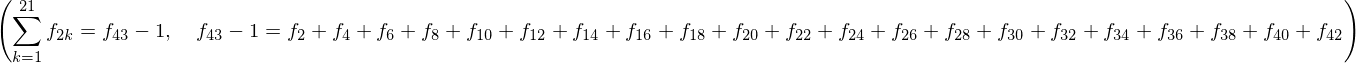

In [19]:
example = even_subscript_fibonacci_eq.subs(n,21)
example_expanded = expand_sum_in_eq(swap_eq(example))
example, example_expanded

In [20]:
example_expanded.subs(fibs)

In [50]:
from itertools import accumulate

enum_range = range(2,50,2)

def worker(accumulated_pair, current_pair):
    index, current = current_pair
    _, accumulated = accumulated_pair
    
    summed_eq = do_memberwise_on_eqs(accumulated, current)
    
    return index, summed_eq

def subs_fib_thm(pair):
    index, current_eq = pair
    swapped_thm = swap_eq(even_subscript_fibonacci_eq)
    expanded_thm = expand_sum_in_eq(swapped_thm.subs(n,Integer(index)/2))
    return index, current_eq, swap_eq(expanded_thm)

def eq_to_subs_dict(eq_term): return {eq_term.lhs:eq_term.rhs}

def apply_subs_on_lhs(triple):
    index, current_eq, thm = triple
    return current_eq.subs(eq_to_subs_dict(thm))

def latex_array_env_of_eqs(mapped):
    from string import Template
    template = Template(r"""\begin{array}{c}$content\end{array}""")
    return template.substitute(content="\n".join(mapped))

def show_latex(triangle):
    from IPython.display import Latex
    eqs, latexes = [], []
    triangle_pair = [(eq_term, latex(eq_term)+r'\\') for eq_term in triangle]
    return (Latex(latex_array_env_of_eqs(map(lambda pair: pair[1], triangle_pair))), 
            map(lambda pair: pair[0], triangle_pair))

In [22]:
triangle = accumulate(zip(enum_range, mapped), worker)

In [23]:
triangle = map(subs_fib_thm, triangle)

In [24]:
triangle = map(apply_subs_on_lhs, triangle)

In [25]:
enhanced_fibs = fibs.copy()
enhanced_fibs.update({f[-1]:1}) # check if this is really the case

triangle, sat = reduce(lambda reduced_pair, current_eq: ((reduced_pair[0]+[current_eq]), 
                                                         reduced_pair[1] and current_eq.subs(enhanced_fibs)), 
                       triangle, ([], True))

from sympy.logic.boolalg import BooleanTrue
assert sat is BooleanTrue()

In [26]:
triangle_latex, triangle = show_latex(triangle)
triangle_latex

<IPython.core.display.Latex object>

which is the sequence [A153861][oeis]. Some details about the undergoing *Binomial transform* are described in [this][companion] companion notebook.

[oeis]:http://oeis.org/A153861
[companion]:http://nbviewer.jupyter.org/github/massimo-nocentini/PhD/blob/master/courses/paa/sympy-notebook/binomial-transform-applied-to-fibonacci-numbers.ipynb?flush_cache=true

In [28]:
odd_fib_rec_eq = Eq(f[n]-1, 7*f[n-15]+28*f[n-14]+56*f[n-13]+70*f[n-12]+56*f[n-11]+28*f[n-10]+8*f[n-9]+f[n-8])
odd_fib_rec_eq

In [32]:
odd_f15 = odd_fib_rec_eq.subs(n,15)
odd_f15, odd_f15.subs(fibs)

In [42]:
odd_f45 = odd_fib_rec_eq.subs(n,18)
odd_f45, odd_f45.subs(fibs), odd_f45.lhs.subs(fibs), odd_f45.rhs.subs(fibs)

In [280]:
triangle = map(lambda eq_term: Eq(eq_term.lhs+1, eq_term.rhs+f[-1]), triangle) # provided that $f[-1]=1$

In [281]:
triangle_latex, triangle = show_latex(triangle)
triangle_latex

<IPython.core.display.Latex object>

where we define $f_{-1}\triangleq 1$, which has a correspondence with [A135392][oeis].

[oeis]:http://oeis.org/A135392

### Tribonacci numbers

The following is an unfolding of [Tribonacci][tribonacci] numbers recurrence.

[tribonacci]:http://oeis.org/A000073

In [32]:
f = IndexedBase('f^{(3)}')
tribonacci_recurrence = Eq(f[n+3],f[n+2]+f[n+1]+f[n])
tribonacci_recurrence

In [40]:
def tribonacci_gf(t): return 1/(1-t-t**2-t**3)

tribonacci_gf(t).series(t,n=14)

In [33]:
boundary_conditions = {f[0]:Integer(0), f[1]:Integer(0), f[2]:Integer(1)}

tribonacci_recurrence_spec=dict(recurrence_eq=tribonacci_recurrence, indexed=f, 
                               index=n, terms_cache=boundary_conditions)

In [34]:
unfolded = do_unfolding_steps(tribonacci_recurrence_spec, 5)
recurrence_eq = project_recurrence_spec(unfolded, recurrence_eq=True)
recurrence_eq

In [35]:
factored_recurrence_eq = project_recurrence_spec(factor_rhs_unfolded_rec(unfolded), recurrence_eq=True)
factored_recurrence_eq

In [36]:
instantiated_rec_spec = base_instantiation(unfolded)

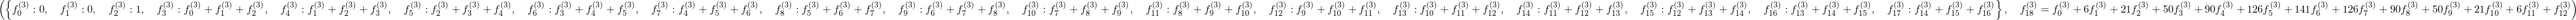

In [37]:
project_recurrence_spec(instantiated_rec_spec, recurrence_eq=True, terms_cache=True)

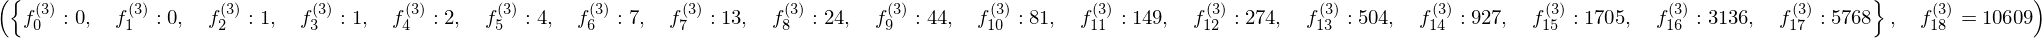

In [38]:
fully_instantiated_spec = repeated_instantiating(instantiated_rec_spec)
project_recurrence_spec(fully_instantiated_spec, recurrence_eq=True, terms_cache=True)

In [39]:
ipython_latex(tribonacci_recurrence_spec, times_range=range(7))

<IPython.core.display.Latex object>

the sequence lying on the middle in the above triangle is known as [A002426][oeis].

[oeis]:http://oeis.org/A002426

## Lucas numbers

Know as [A000032][oeis].

[oeis]:http://oeis.org/A000032

In [5]:
l = IndexedBase('l')
lucas_recurrence = Eq(l[n+2],l[n+1]+l[n])
lucas_recurrence

In [6]:
boundary_conditions = {l[0]:Integer(2), l[1]:Integer(1)}
lucas_recurrence_spec=dict(recurrence_eq=lucas_recurrence, indexed=l, 
                               index=n, terms_cache=boundary_conditions)

In [7]:
unfolded = do_unfolding_steps(lucas_recurrence_spec, 5)

In [8]:
recurrence_eq = project_recurrence_spec(unfolded, recurrence_eq=True)
recurrence_eq

In [9]:
factored_recurrence_eq = project_recurrence_spec(factor_rhs_unfolded_rec(unfolded), recurrence_eq=True)
factored_recurrence_eq

In [10]:
factored_recurrence_eq.subs(n,10)

In [11]:
instantiated_rec_spec = base_instantiation(unfolded)

In [12]:
project_recurrence_spec(instantiated_rec_spec, recurrence_eq=True, terms_cache=True)

In [13]:
fully_instantiated_spec = repeated_instantiating(instantiated_rec_spec)
project_recurrence_spec(fully_instantiated_spec, recurrence_eq=True, terms_cache=True)

In [14]:
ipython_latex(lucas_recurrence_spec, times_range=range(10))

<IPython.core.display.Latex object>

## Another recurrence relation on Fibonacci numbers

In [21]:
f = IndexedBase('f')
fibonacci_recurrence = Eq(f[2*n+1],f[n]**2+f[n+1]**2)
fibonacci_recurrence

In [22]:
boundary_conditions = {f[0]:Integer(1), f[1]:Integer(1)}
fibonacci_recurrence_spec=dict(recurrence_eq=fibonacci_recurrence, indexed=f, 
                               index=n, terms_cache=boundary_conditions)

In [23]:
unfolded = do_unfolding_steps(fibonacci_recurrence_spec, 2)

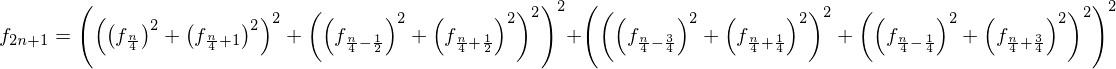

In [24]:
recurrence_eq = project_recurrence_spec(unfolded, recurrence_eq=True)
recurrence_eq

In [92]:
factored_recurrence_eq = project_recurrence_spec(factor_rhs_unfolded_rec(unfolded), recurrence_eq=True)
factored_recurrence_eq

In [95]:
factored_recurrence_eq.subs(n,3)

## Unfolding a recurrence with generic coefficients

In [4]:
s = IndexedBase('s')
a = IndexedBase('a')
swaps_recurrence = Eq(n*s[n],(n+1)*s[n-1]+a[n])
swaps_recurrence

In [5]:
boundary_conditions = {s[0]:Integer(0)}
swaps_recurrence_spec=dict(recurrence_eq=swaps_recurrence, indexed=s, 
                               index=n, terms_cache=boundary_conditions)

In [6]:
unfolded = do_unfolding_steps(swaps_recurrence_spec, 4)

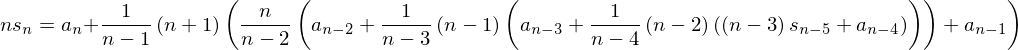

In [7]:
recurrence_eq = project_recurrence_spec(unfolded, recurrence_eq=True)
recurrence_eq

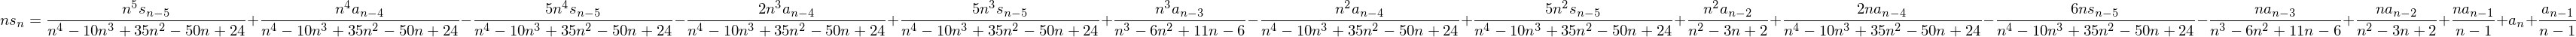

In [8]:
factored_recurrence_eq = project_recurrence_spec(factor_rhs_unfolded_rec(unfolded), recurrence_eq=True)
factored_recurrence_eq

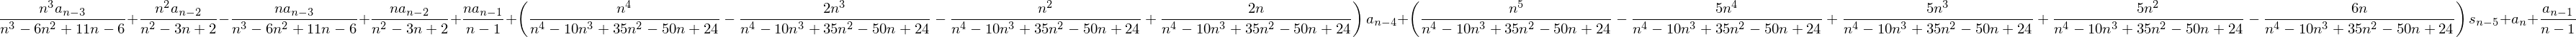

In [9]:
factored_recurrence_eq.rhs.collect(s[n-5]).collect(a[n-4])

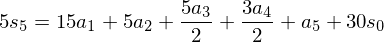

In [10]:
factored_recurrence_eq.subs(n,5)

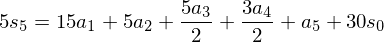

In [11]:
recurrence_eq.subs(n, 5)

In [12]:
def additional_term(n): return (2*Integer(n)-3)/6

as_dict = {a[n]:additional_term(n) for n in range(1,6)}

recurrence_eq.subs(n, 5).subs(as_dict)

---
## some attempts on using unevaluated `Subs` objects

In [42]:
n2_subs = Subs(fibonacci_recurrence, f[n-1], f[n-3]+f[n-2])
n2_subs

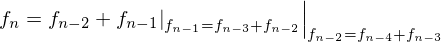

In [43]:
n1_subs = Subs(n2_subs, f[n-2], f[n-4]+f[n-3])
n1_subs

In [44]:
n1_subs.doit()

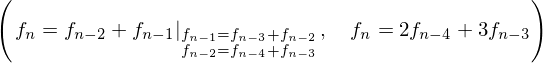

In [35]:
n_subs = Subs(fibonacci_recurrence, [f[n-1],f[n-2]], [f[n-3]+f[n-2], f[n-4]+f[n-3]], simultaneous=True)
n_subs, n_subs.doit()

In [36]:
n_subs.expr, n_subs.variables, n_subs.point

In [37]:
n_subs.args

In [38]:
def do_simultaneous_subs(subs_term):
    expr_term, variables, points, *_ = subs_term.args
    substitutions = {k:v for k,v in zip(variables, points)}
    return expr_term.subs(substitutions, simultaneous=True)

In [39]:
do_simultaneous_subs(n_subs)

In [40]:
n1_subs.expr

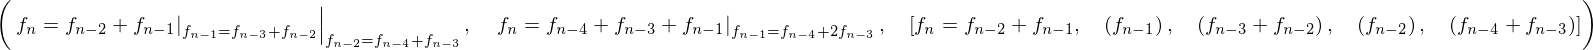

In [41]:
n1_subs, do_simultaneous_subs(n1_subs), flatten(n1_subs.args, cls=Subs)

In [42]:
ite_term = ITE(Eq(Mod(n,2),1), n+1, n)
my_lambda_subs = Lambda(n, ite_term)
ite_term,ite_term.subs(n,3),my_lambda_subs(3)

In [43]:
power_fib = Eq(f[2*n+1],ITE(Eq(Mod(n,2),1), Subs(f[n]**2+f[n+1]**2, f[n], 2), Subs(f[n]**2+f[n+1]**2, f[n+1], 3)))
power_fib

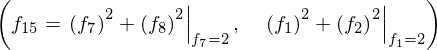

In [44]:
power_fib.subs({n:7}), power_fib.subs({n:(n-1)/2}).rhs.subs({n:3})

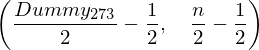

In [45]:
d = Dummy()
sol = solve(Eq(2*n+1,d),n)[0]
sol, sol.subs(d,n)


In [46]:
n_subs.doit()

In [47]:
n_subs.args